In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [4]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

def cross_entropy_from_logits(z, t):
  a = np.log(1. + np.exp(-z))
  loss = np.mean(a + z - t*z)
  return loss

def accuracy(y, t):
  pred = y > 0.5
  return np.mean(pred == t)


iris = load_iris()
x = iris.data[:, -2:]
t = iris.target
[n, d] = x.shape
p = np.random.permutation(n)
x = x[p, :]
t = t[p]
t = t[:, None]
#---
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.33, random_state=42)
# ---
clase_setosa = 0

x_train_e1 = x_train
x_test_e1 = x_test

t_train_e1 = (t_train == clase_setosa) * 1
t_test_e1 = (t_test == clase_setosa) * 1

# -- Entrenamineto

# Entrenamiento del modelo:

d = x_train_e1.shape[1]

w = np.random.randn(d, 1)
b = np.random.randn()

nepocas = 1000
eta = 0.001

k = 1
loss_train = []
acc_train = []
loss_test = []
acc_test = []
for i in range(nepocas):
    # Calcula cross-entropy en training
    z_train = x_train_e1 @ w + b
    y_train = sigmoid(z_train)
    e_train = cross_entropy_from_logits(z_train, t_train_e1)
    a_train = accuracy(y_train, t_train_e1)

    loss_train.append(e_train)
    acc_train.append(a_train)

    # Calcula cross-entropy en test
    z_test = x_test_e1 @ w + b
    y_test = sigmoid(z_test)
    e_test = cross_entropy_from_logits(z_test, t_test_e1)
    a_test = accuracy(y_test, t_test_e1)

    loss_test.append(e_test)
    acc_test.append(a_test)

    # Calcula los gradientes y actualiza los parametros
    y_minus_t = y_train - t_train_e1
    db = y_minus_t.sum()
    dw = x_train_e1.T @ y_minus_t
    b -= eta*db
    w -= eta*dw

---- EXTRACCION -----

In [9]:
xx, yy = np.meshgrid(np.arange(x_train_e1[:, 0].min()-1, x_train_e1[:, 0].max()+1, 0.1), 
                     np.arange(x_train_e1[:, 1].min()-1, x_train_e1[:, 1].max()+1, 0.1))
xy = np.concatenate([xx.reshape([1, -1]), yy.reshape([1, -1])],axis=0).T
xy.shape

(3432, 2)

In [10]:
z = sigmoid(xy @ w + b)
z.shape

(3432, 1)

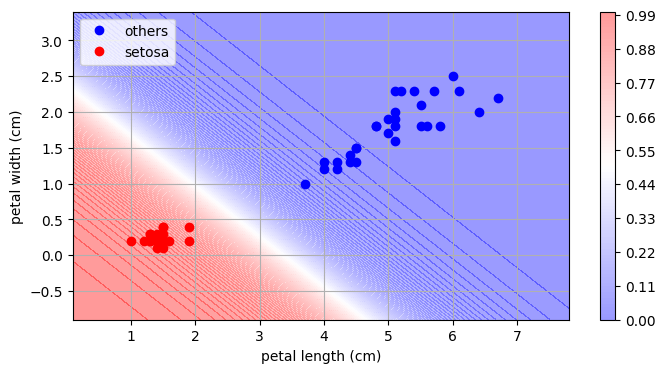

In [11]:
plt.figure(figsize=(8, 4))

plt.contourf(xx, yy, z[:, 0].reshape(xx.shape), 100, cmap="bwr", alpha=0.4, vmin=0.0, vmax=1.0)

plt.plot(x_test_e1[t_test_e1.ravel()==0, 0], x_test_e1[t_test_e1.ravel()==0, 1], 'o', label="others", color='blue')
plt.plot(x_test_e1[t_test_e1.ravel()!=0, 0], x_test_e1[t_test_e1.ravel()!=0, 1], 'o', label='setosa', color='red')

plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.grid(True)     
plt.legend(loc=2)
plt.colorbar()
plt.show()